# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Angga Dwi Kurniawan
- **Email:** anggadwikurniawan6@gmail.com
- **ID Dicoding:** angga2k

## Menentukan Pertanyaan Bisnis

- **Product Review** : Apakah produk dengan ulasan lebih tinggi cenderung memiliki penjualan lebih banyak? Bagaimana skor ulasan mempengaruhi perilaku pembelian?
- **Payment Method and Payments Installments** : Metode Pembayaran apa yang paling banyak digunakan oleh pelanggan, dan berapa rata rata Nilai pesanan disetiap metode pembayarannya?

## Import Semua Packages/Library yang Digunakan

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [71]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [72]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [73]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [74]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [75]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [76]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [77]:
products_category_translation_df = pd.read_csv('data/product_category_name_translation.csv')
products_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [78]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [79]:
selling_df = pd.read_csv('data/sellers_dataset.csv')
selling_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Setelah melakukan Gathering data, terlihat banyak sekali data disetiap Datasetnya. bisa jadi terdapat kesalahan pada setiap Datasetnya (Duplicate, Missing Data Type, NaN, dll)

### Assessing Data

#### Menilai tabel `customers_df`

In [80]:
customers_df.info

<bound method DataFrame.info of                             customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          cu

In [81]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [82]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [83]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [84]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [85]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [86]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [87]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `order_items_df`

In [88]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [89]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [90]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [91]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `order_payments_df`

In [92]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [93]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [94]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [95]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `orders_df`

In [96]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [97]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [98]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [99]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `order_reviews_df`

In [100]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [101]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [102]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [103]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `product_category_name_translation_df`

In [104]:
products_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [105]:
products_category_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [106]:
print("Jumlah duplikasi: ", products_category_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [107]:
products_category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `products_df`

In [108]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [109]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [110]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [111]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

In [112]:
selling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [113]:
selling_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [114]:
print("Jumlah duplikasi: ", selling_df.duplicated().sum())

Jumlah duplikasi:  0


In [115]:
selling_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Setelah melakukan Assesing Data, terlihat ada beberapa Dataset yang perlu dilakukan cleaning sebelum ke tahapan EDA
- Dataset yang perlu diperbaiki adalah `geolocation_df, orders_df, dan products_df` dan masing - masing terdapat kesalahan yang perlu ke tahapan cleaning terlebih dahulu

### Cleaning Data

`Orders`

Invalid Data Type 

In [116]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

In [117]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


`Products`

Missing Value
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

In [118]:
product_size = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
products_df.fillna({col: products_df[col].mean() for col in product_size}, inplace=True)

In [119]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

`Geolocation`

Drop Duplicate (subset : geolocation_zip_code_prefix)

In [120]:
geolocation_df.drop_duplicates(subset='geolocation_zip_code_prefix', inplace=True)

In [121]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Setelah dilakukan Cleaning, Data yang akan digunakan nantinya bisa digunakan dengan lebih baik. Dengan cara assesing yang tepat, saya belajar bagaimana tahapan untuk ke bagian Cleaning sebelum data digunakan.

## Exploratory Data Analysis (EDA)

### Explore `Order Items and Order Reviews`

Merge Order Items, and Order Review

In [122]:
merged_data = pd.merge(order_items_df, order_reviews_df, on='order_id', how='left')
merged_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5.0,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [123]:
merged_data.to_csv("data/order_items_and_reviews.csv", index=False)

In [124]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 113314 non-null  object 
 1   order_item_id            113314 non-null  int64  
 2   product_id               113314 non-null  object 
 3   seller_id                113314 non-null  object 
 4   shipping_limit_date      113314 non-null  object 
 5   price                    113314 non-null  float64
 6   freight_value            113314 non-null  float64
 7   review_id                112372 non-null  object 
 8   review_score             112372 non-null  float64
 9   review_comment_title     13434 non-null   object 
 10  review_comment_message   47642 non-null   object 
 11  review_creation_date     112372 non-null  object 
 12  review_answer_timestamp  112372 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 11.2+ MB


In [125]:
sales_by_review_score = merged_data.groupby('review_score')['order_id'].count().reset_index(name='sales_count')
sales_by_review_score

,review_score,sales_count
0,1.0,14235
1,2.0,3874
2,3.0,9423
3,4.0,21315
4,5.0,63525


### Explore `Order Payments and Orders`

Merged Order Payments and Orders

In [126]:
merged_data_payment = pd.merge(order_payments_df, orders_df, on='order_id', how='inner')
merged_data_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24


In [127]:
payment_method_frequency = merged_data_payment.groupby('payment_type')['order_id'].count().reset_index(name='payment_count').sort_values(by='payment_count', ascending=False)
payment_method_frequency

,payment_type,payment_count
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


In [128]:
payment_value_analysis = merged_data_payment.groupby('payment_type')['payment_value'].mean().reset_index(name='average_payment_value')
payment_value_analysis

,payment_type,average_payment_value
0,boleto,145.034435
1,credit_card,163.319021
2,debit_card,142.570170
3,not_defined,0.000000
4,voucher,65.703354


In [129]:
merged_data_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   payment_sequential             103886 non-null  int64         
 2   payment_type                   103886 non-null  object        
 3   payment_installments           103886 non-null  int64         
 4   payment_value                  103886 non-null  float64       
 5   customer_id                    103886 non-null  object        
 6   order_status                   103886 non-null  object        
 7   order_purchase_timestamp       103886 non-null  datetime64[ns]
 8   order_approved_at              103711 non-null  datetime64[ns]
 9   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 10  order_delivered_customer_date  100754 non-null  datetime64[ns]
 11  

In [130]:
merged_data_payment.to_csv('data/order_payments_and_orders.csv', index=False)

Explore `customers_df, orders_df, order_payments_df, order_items_df, products_df, geolocation_df`

In [131]:
merged_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    on="customer_id"
)
merged_df.shape

(99441, 12)

In [132]:
merged2_df = pd.merge(
    left=merged_df,
    right=order_payments_df,
    how="left",
    on="order_id"
)
merged2_df.shape

(103887, 16)

In [133]:
merged3_df = pd.merge(
    left=merged2_df,
    right=order_items_df,
    how="left",
    on="order_id"
)
merged3_df.shape

(118434, 22)

In [134]:
merged4_df = pd.merge(
    left=merged3_df,
    right=products_df,
    how="left",
    on="product_id"
)
merged4_df.shape

(118434, 30)

In [135]:
merged5_df = pd.merge(
    left=merged4_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
merged5_df.duplicated().sum()

np.int64(0)

In [136]:
merged5_df.to_csv("dashboard/main_data.csv", index=False)

Hasil merged disimpan di main_data.csv

In [138]:
main_df = merged5_df
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118434 non-null  object        
 1   customer_unique_id             118434 non-null  object        
 2   customer_zip_code_prefix       118434 non-null  int64         
 3   customer_city                  118434 non-null  object        
 4   customer_state                 118434 non-null  object        
 5   order_id                       118434 non-null  object        
 6   order_status                   118434 non-null  object        
 7   order_purchase_timestamp       118434 non-null  datetime64[ns]
 8   order_approved_at              118258 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116360 non-null  datetime64[ns]
 10  order_delivered_customer_date  115037 non-null  datetime64[ns]
 11  

**Insight:**
- Order Items and Order Review
    - Disini dengan saya melakukan EDA untuk mencari total dari penjualan, ulasan bisa sangat mempengaruhi terhadap penjualan.

- Order Payments and Orders
    - Disini dengan saya melakukan tahapan EDA untuk mencari Rata - rata, dan berapa banyak pelanggan menggunakan Payment method di pembeliannya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

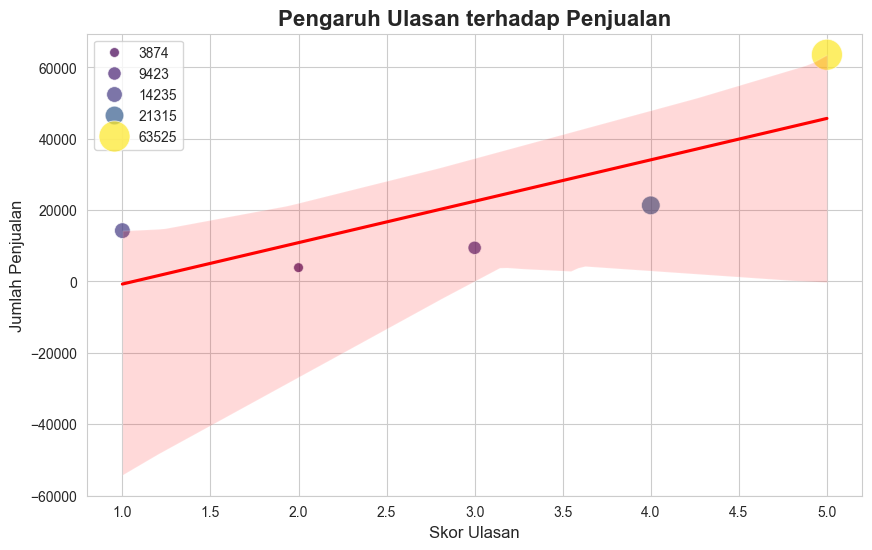

In [260]:
# Set style dan ukuran figure
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Palet warna yang menarik dan pengaturan ukuran titik (marker size)
palette = sns.color_palette("viridis", as_cmap=True)

# Scatter plot dengan variasi ukuran titik berdasarkan jumlah penjualan
ax = sns.scatterplot(
    data=sales_by_review_score, 
    x='review_score', 
    y='sales_count', 
    size='sales_count',  # Ukuran titik berdasarkan jumlah penjualan
    sizes=(50, 500),     # Ukuran titik minimum dan maksimum
    hue='sales_count',   # Warna titik berdasarkan jumlah penjualan
    palette=palette, 
    alpha=0.7            # Transparansi titik
)

# Tambahkan regresi linier untuk melihat tren
sns.regplot(
    data=sales_by_review_score, 
    x='review_score', 
    y='sales_count', 
    scatter=False, 
    color='red', 
    line_kws={'label': 'Tren Linear'}
)

# Customisasi judul dan label
plt.title('Pengaruh Ulasan terhadap Penjualan', fontsize=16, fontweight='bold')
plt.xlabel('Skor Ulasan', fontsize=12)
plt.ylabel('Jumlah Penjualan', fontsize=12)

# Menampilkan legend
plt.legend()

# Tampilkan plot
plt.show()

### Pertanyaan 2:

C:\Users\YOLO\AppData\Local\Temp\ipykernel_21068\3206870888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=payment_method_frequency, x='payment_type', y='payment_count', palette=palette)
C:\Users\YOLO\AppData\Local\Temp\ipykernel_21068\3206870888.py:9: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(data=payment_method_frequency, x='payment_type', y='payment_count', palette=palette)


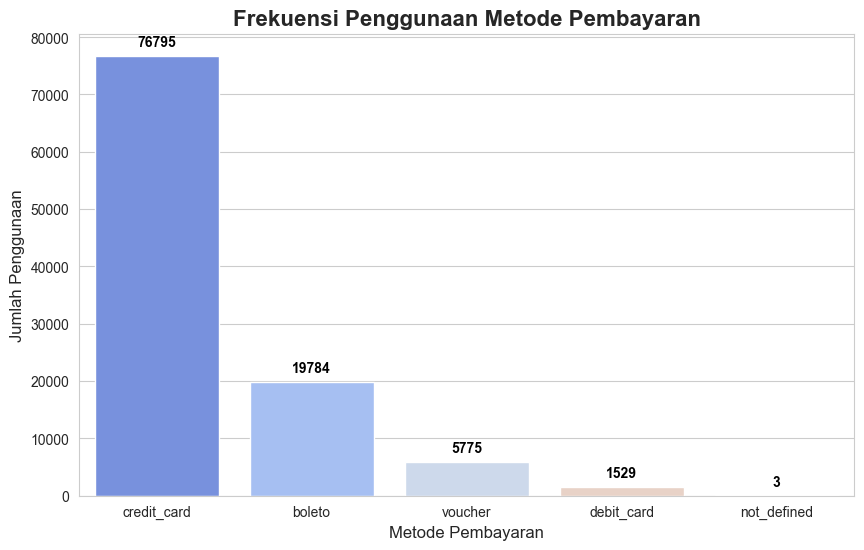

C:\Users\YOLO\AppData\Local\Temp\ipykernel_21068\3206870888.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=payment_value_analysis, x='payment_type', y='average_payment_value', palette=palette)
C:\Users\YOLO\AppData\Local\Temp\ipykernel_21068\3206870888.py:27: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax2 = sns.barplot(data=payment_value_analysis, x='payment_type', y='average_payment_value', palette=palette)


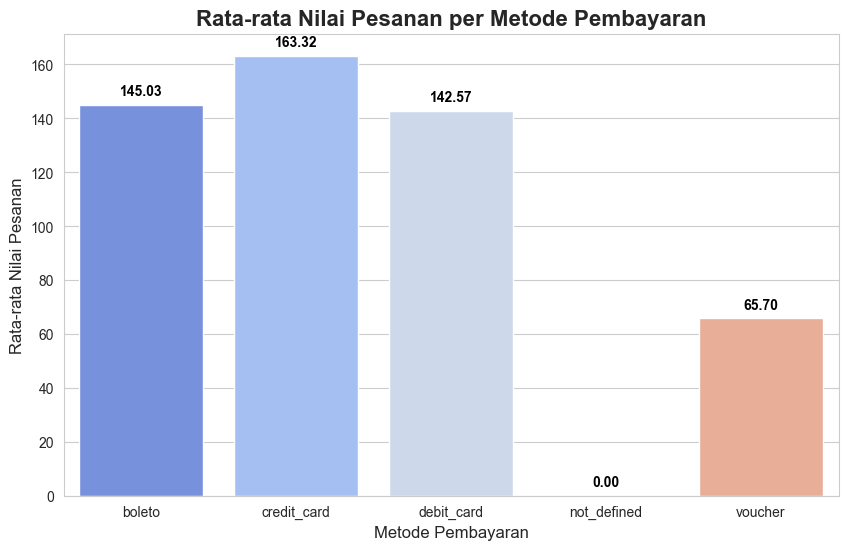

In [261]:
# Set style dan figure size
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Palet warna yang menarik
palette = sns.color_palette("coolwarm")

# Visualisasi frekuensi metode pembayaran dengan anotasi
ax = sns.barplot(data=payment_method_frequency, x='payment_type', y='payment_count', palette=palette)
plt.title('Frekuensi Penggunaan Metode Pembayaran', fontsize=16, fontweight='bold')
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Jumlah Penggunaan', fontsize=12)

# Tambahkan nilai di atas bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=10, color='black', fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Visualisasi rata-rata nilai pesanan berdasarkan metode pembayaran dengan anotasi
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=payment_value_analysis, x='payment_type', y='average_payment_value', palette=palette)
plt.title('Rata-rata Nilai Pesanan per Metode Pembayaran', fontsize=16, fontweight='bold')
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Rata-rata Nilai Pesanan', fontsize=12)

# Tambahkan nilai di atas bar
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points', fontsize=10, color='black', fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- **Product Review** : Ulasan terkait rating ini bisa dikatakan sangat dibutuhkan karena, terlihat bahwa rating dengan nilai 5 itu lebih banyak penjualannya. Tetapi tidak menutup kemungkinan ternyata dengan tingkat rating 1 juga banyak.
- **Payment Method and Payments Installments** : Dengan adanya visualization ini terlihat rata rata nilai pesanan dengan beberapa metode pembayaran dan frekuensi penggunaannya juga. dan Penggunaan Credit Card sangat banyak dibandingkan dengan metode lainnya

## Analisis Lanjutan (Opsional)

In [262]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

### Analisis RFM
---

1. Recency : Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian (order_purchase_timestamp)
2. Frequency : Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu (order_id)
3. Monetary : Menghitung total pengeluaran pelanggan dalam periode tersebut (price).

In [263]:
rfm_df = main_df.groupby(by="customer_id", as_index=False).agg({
    'order_purchase_timestamp' : 'max',
    'order_id' : 'nunique',
    'price' : 'sum'
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [264]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = main_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,198


In [265]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

In [266]:
rfm_df.describe()

,frequency,monetary,recency
count,99441.0,99441.000000,99441.000000
mean,1.0,143.539382,290.272956
std,0.0,241.433332,153.670615
min,1.0,0.000000,0.000000
25%,1.0,45.950000,166.000000
50%,1.0,89.000000,272.000000
75%,1.0,153.800000,400.000000
max,1.0,13440.000000,773.000000


C:\Users\YOLO\AppData\Local\Temp\ipykernel_21068\1675953030.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\YOLO\AppData\Local\Temp\ipykernel_21068\1675953030.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\YOLO\AppData\Local\Temp\ipykernel_21068\1675953030.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

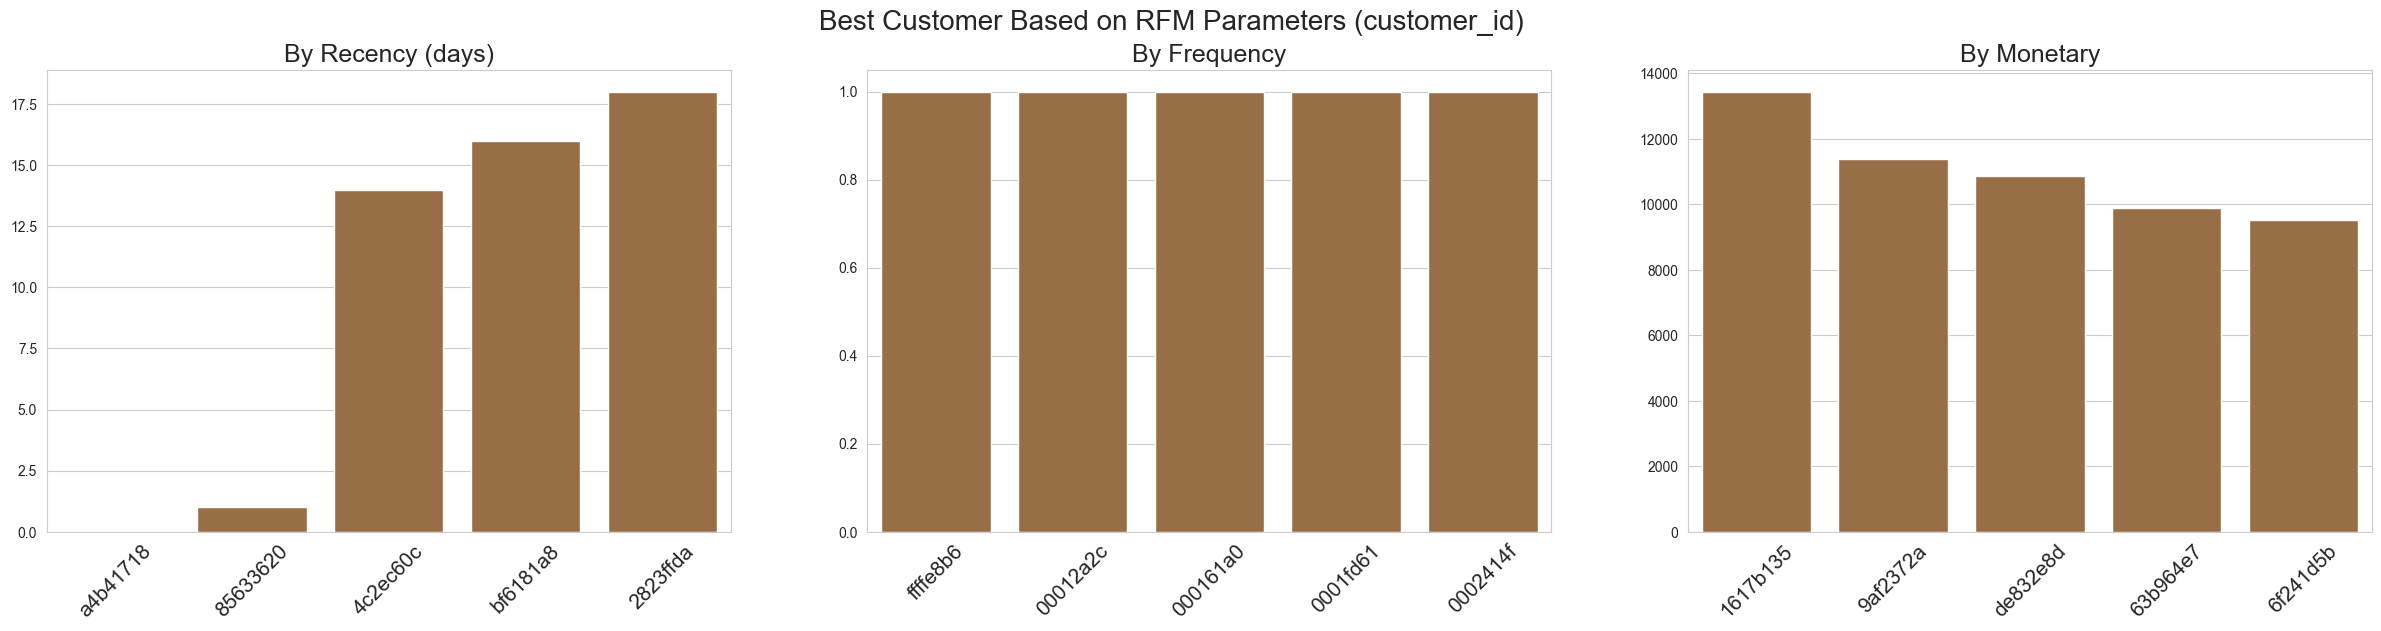

In [267]:
# Create a shortened version of customer_id
rfm_df['short_customer_id'] = rfm_df['customer_id'].apply(lambda x: x[:8])  # Display first 8 characters

# Plotting with shortened customer_id
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#A66E38", "#A66E38", "#A66E38", "#A66E38", "#A66E38"]

sns.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="short_customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

for axis in ax:
    axis.tick_params(axis='x', rotation=45)
    
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [268]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,short_customer_id,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,00012a2c,34364.5,49721.0,50182.5
1,000161a058600d5901f007fab4c27140,1,54.90,458,000161a0,16871.5,49721.0,31252.5
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,0001fd61,2882.0,49721.0,79937.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,0002414f,21181.5,49721.0,73341.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,000379cd,66986.5,49721.0,52578.5


## Conclusion

- **Product Review** : Analisis ulasan produk menunjukkan adanya korelasi yang kuat antara rating yang lebih tinggi dengan peningkatan penjualan. Produk dengan rating 5 cenderung memiliki penjualan yang paling tinggi, menandakan bahwa ulasan positif sangat memengaruhi keputusan pembelian konsumen. Namun, menariknya, produk dengan rating 1 juga masih menghasilkan penjualan yang signifikan. Hal ini menunjukkan bahwa selain rating, faktor lain seperti harga, ketersediaan, atau kebutuhan mendesak mungkin juga menjadi alasan utama konsumen tetap melakukan pembelian meski ulasan produk tersebut kurang baik.
- **Payments Method and Installments** : Dari hasil analisis metode pembayaran, terlihat bahwa penggunaan kartu kredit merupakan yang paling dominan, jauh lebih sering digunakan dibandingkan metode pembayaran lainnya. Popularitas kartu kredit ini kemungkinan didorong oleh fleksibilitas yang ditawarkan, seperti opsi cicilan, yang dapat mendorong konsumen untuk melakukan pembelian dengan nilai yang lebih besar atau lebih sering. Selain itu, analisis ini juga menunjukkan bahwa nilai pesanan rata-rata berbeda-beda tergantung pada metode pembayaran yang digunakan, sehingga dapat memberikan wawasan lebih dalam tentang perilaku konsumen berdasarkan preferensi pembayaran mereka. Informasi ini bisa dimanfaatkan untuk menyesuaikan opsi pembayaran guna mendorong transaksi dengan nilai yang lebih tinggi.